# Annotate Main Clusters

### 1. Import Required Packages 
### 2. Import Prior Data 
### 3. Annotate Clusters in New Column based on Previous Analyses
### 4. Determine Marker Genes on Clusters
### 5. Save Everything
### 6. Conclusion

## <br> 1. Import Required Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import anndata as ad
import seaborn as sns

from scvi.model.utils import mde
from scipy import sparse
from anndata import AnnData
from anndata.experimental.multi_files import AnnCollection

[rank: 0] Global seed set to 0


Set figure parameters.

In [2]:
sc.set_figure_params(figsize=(5,5))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200

## <br> 2. Import Prior Clustered Data

In [3]:
adata = ad.read_h5ad('./Adata_Objects/01b_AllGenes_Clustered.h5ad')

In [4]:
print(adata.raw)

Raw AnnData with n_obs × n_vars = 263074 × 22917


In [5]:
print(adata)

AnnData object with n_obs × n_vars = 263074 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'


## <br> 3. Annotate Cells in New Column based on Previous Analyses

In [6]:
bdata = adata.copy()

In [7]:
bdata.obs['Main_Cluster'] = "Null"

In [8]:
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '5', "1", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '6', "2", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '7', "3", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '9', "4", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '10', "5", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '3', "6", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '13', "7", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '4', "8", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.5'] == '12', "9", bdata.obs['Main_Cluster'])

bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.25'] == '0', "10", bdata.obs['Main_Cluster'])
bdata.obs['Main_Cluster'] = np.where(bdata.obs['leiden_scVI_res_0.25'] == '1', "11", bdata.obs['Main_Cluster'])


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


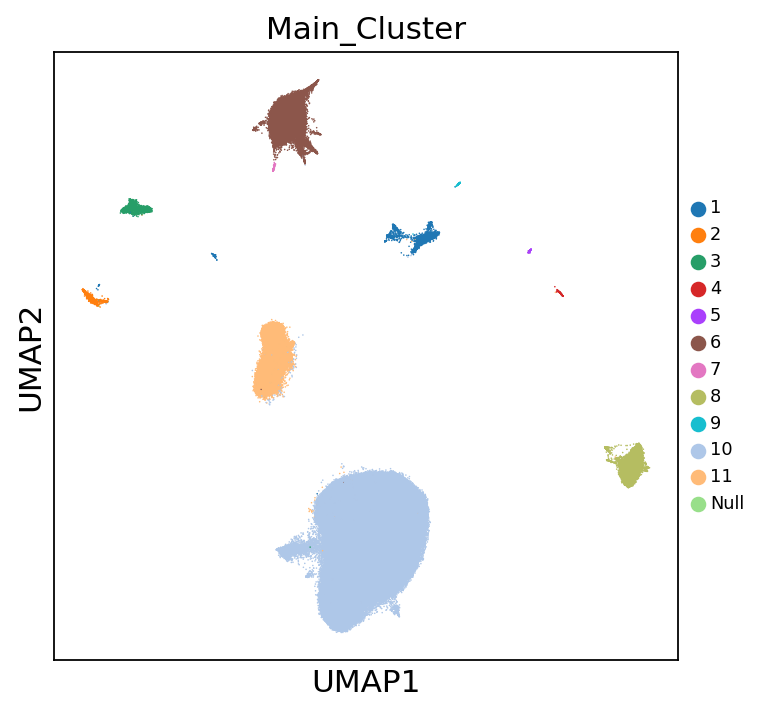

In [9]:
sc.pl.umap(
    bdata,
    color=["Main_Cluster"],
    #legend_loc="on data",
    legend_fontsize=8,
    legend_fontweight='normal',
    frameon=True,
    size=2,
    #palette = sns.color_palette("hls", 10),
    #save='Annotated_Cells_For_Publishing-TCDDOnly.pdf'
)

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


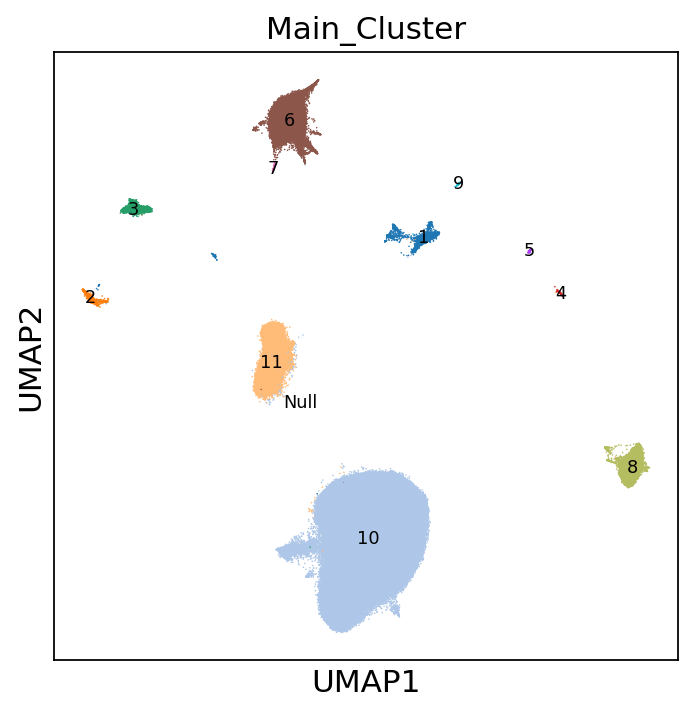

In [10]:
sc.pl.umap(
    bdata,
    color=["Main_Cluster"],
    legend_loc="on data",
    legend_fontsize=8,
    legend_fontweight='normal',
    frameon=True,
    size=2,
    #palette = sns.color_palette("hls", 10),
    #save='Annotated_Cells_For_Publishing-TCDDOnly.pdf'
)

In [11]:
bdata.obs['Main_Cluster'].unique()

['10', '6', '1', '8', '11', ..., '2', '9', '7', '5', 'Null']
Length: 12
Categories (12, object): ['1', '2', '3', '4', ..., '9', '10', '11', 'Null']

In [12]:
bdata.obs['Main_Cluster'].value_counts()

10      181651
11       30527
6        24964
8         9408
1         6401
2         4262
3         4133
4          722
5          546
9          297
7          159
Null         4
Name: Main_Cluster, dtype: int64

In [13]:
bdata = bdata[bdata.obs['Main_Cluster'] != "Null"]

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


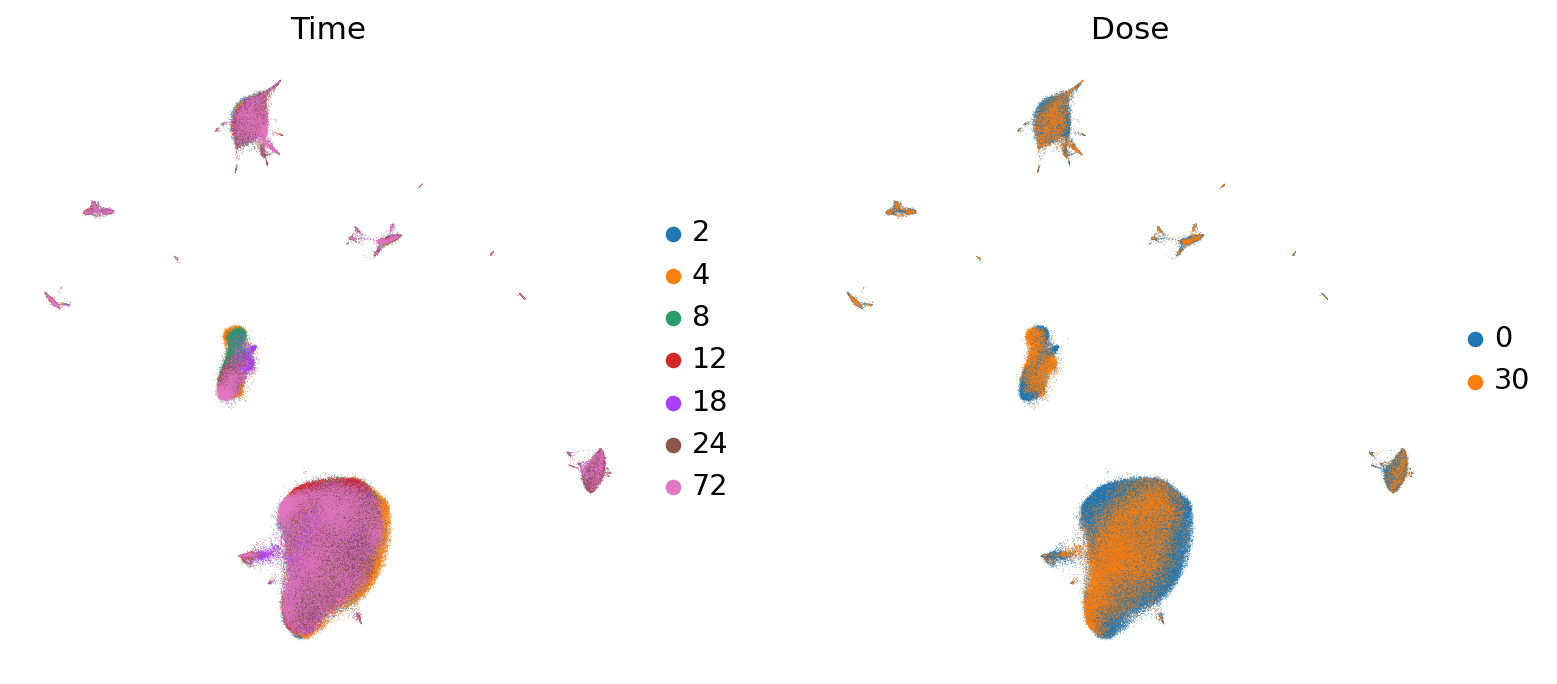

In [14]:
sc.pl.umap(
    bdata,
    color=["Time", "Dose"],
    ncols=2,
    frameon=False,
)

In [15]:
cdata = bdata.copy()

In [16]:
print(cdata)

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50', 'Main_Cluster'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'Main_Cluster_colors', 'Time_colors', 'Dose_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'


In [17]:
cdata.obs = cdata.obs[['Dose', 'Time', 'OrigIdent', 'Main_Cluster',
                       'n_genes_by_counts', 'total_counts', 
                       'total_counts_mt', 'pct_counts_mt', 'n_genes', 
                       'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 
                       'doublet_scores', 'predicted_doublets', 'doublet_info', 
                       'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 
                       'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50']]

In [18]:
print(cdata)

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'Main_Cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'Main_Cluster_colors', 'Time_colors', 'Dose_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'


Copy adata object to integrate clustering resultering with adata object that contains all genes

In [19]:
cdata = cdata.copy()
cdata_ALL_GENES = cdata.copy()

# <br> 4. Determine Marker Genes on Clusters

In [20]:
sc.pp.log1p(cdata_ALL_GENES)

In [21]:
sc.tl.rank_genes_groups(cdata_ALL_GENES, 
                        'Main_Cluster', 
                        method='wilcoxon', 
                        key_added = "Main_Cluster_Wilcoxon")

/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  entrypoints.init_all()


### <br> Example on how to view results

In [25]:
sc.get.rank_genes_groups_df(cdata_ALL_GENES, group='1', key='Main_Cluster_Wilcoxon')

,names,scores,logfoldchanges,pvals,pvals_adj
0,Fyb,115.611298,7.361715,0.0,0.0
1,Ptprj,112.304337,3.187374,0.0,0.0
2,Slc8a1,108.287903,7.585133,0.0,0.0
3,Lyn,108.182846,3.832848,0.0,0.0
4,Zeb2,103.730637,4.800198,0.0,0.0
...,...,...,...,...,...
22912,Sox5,-78.625565,-2.042315,0.0,0.0
22913,Neat1,-79.411560,-1.990460,0.0,0.0
22914,Dpyd,-83.222099,-1.268449,0.0,0.0
22915,Magi1,-83.604553,-2.292687,0.0,0.0


### <br> Example on how to plot results

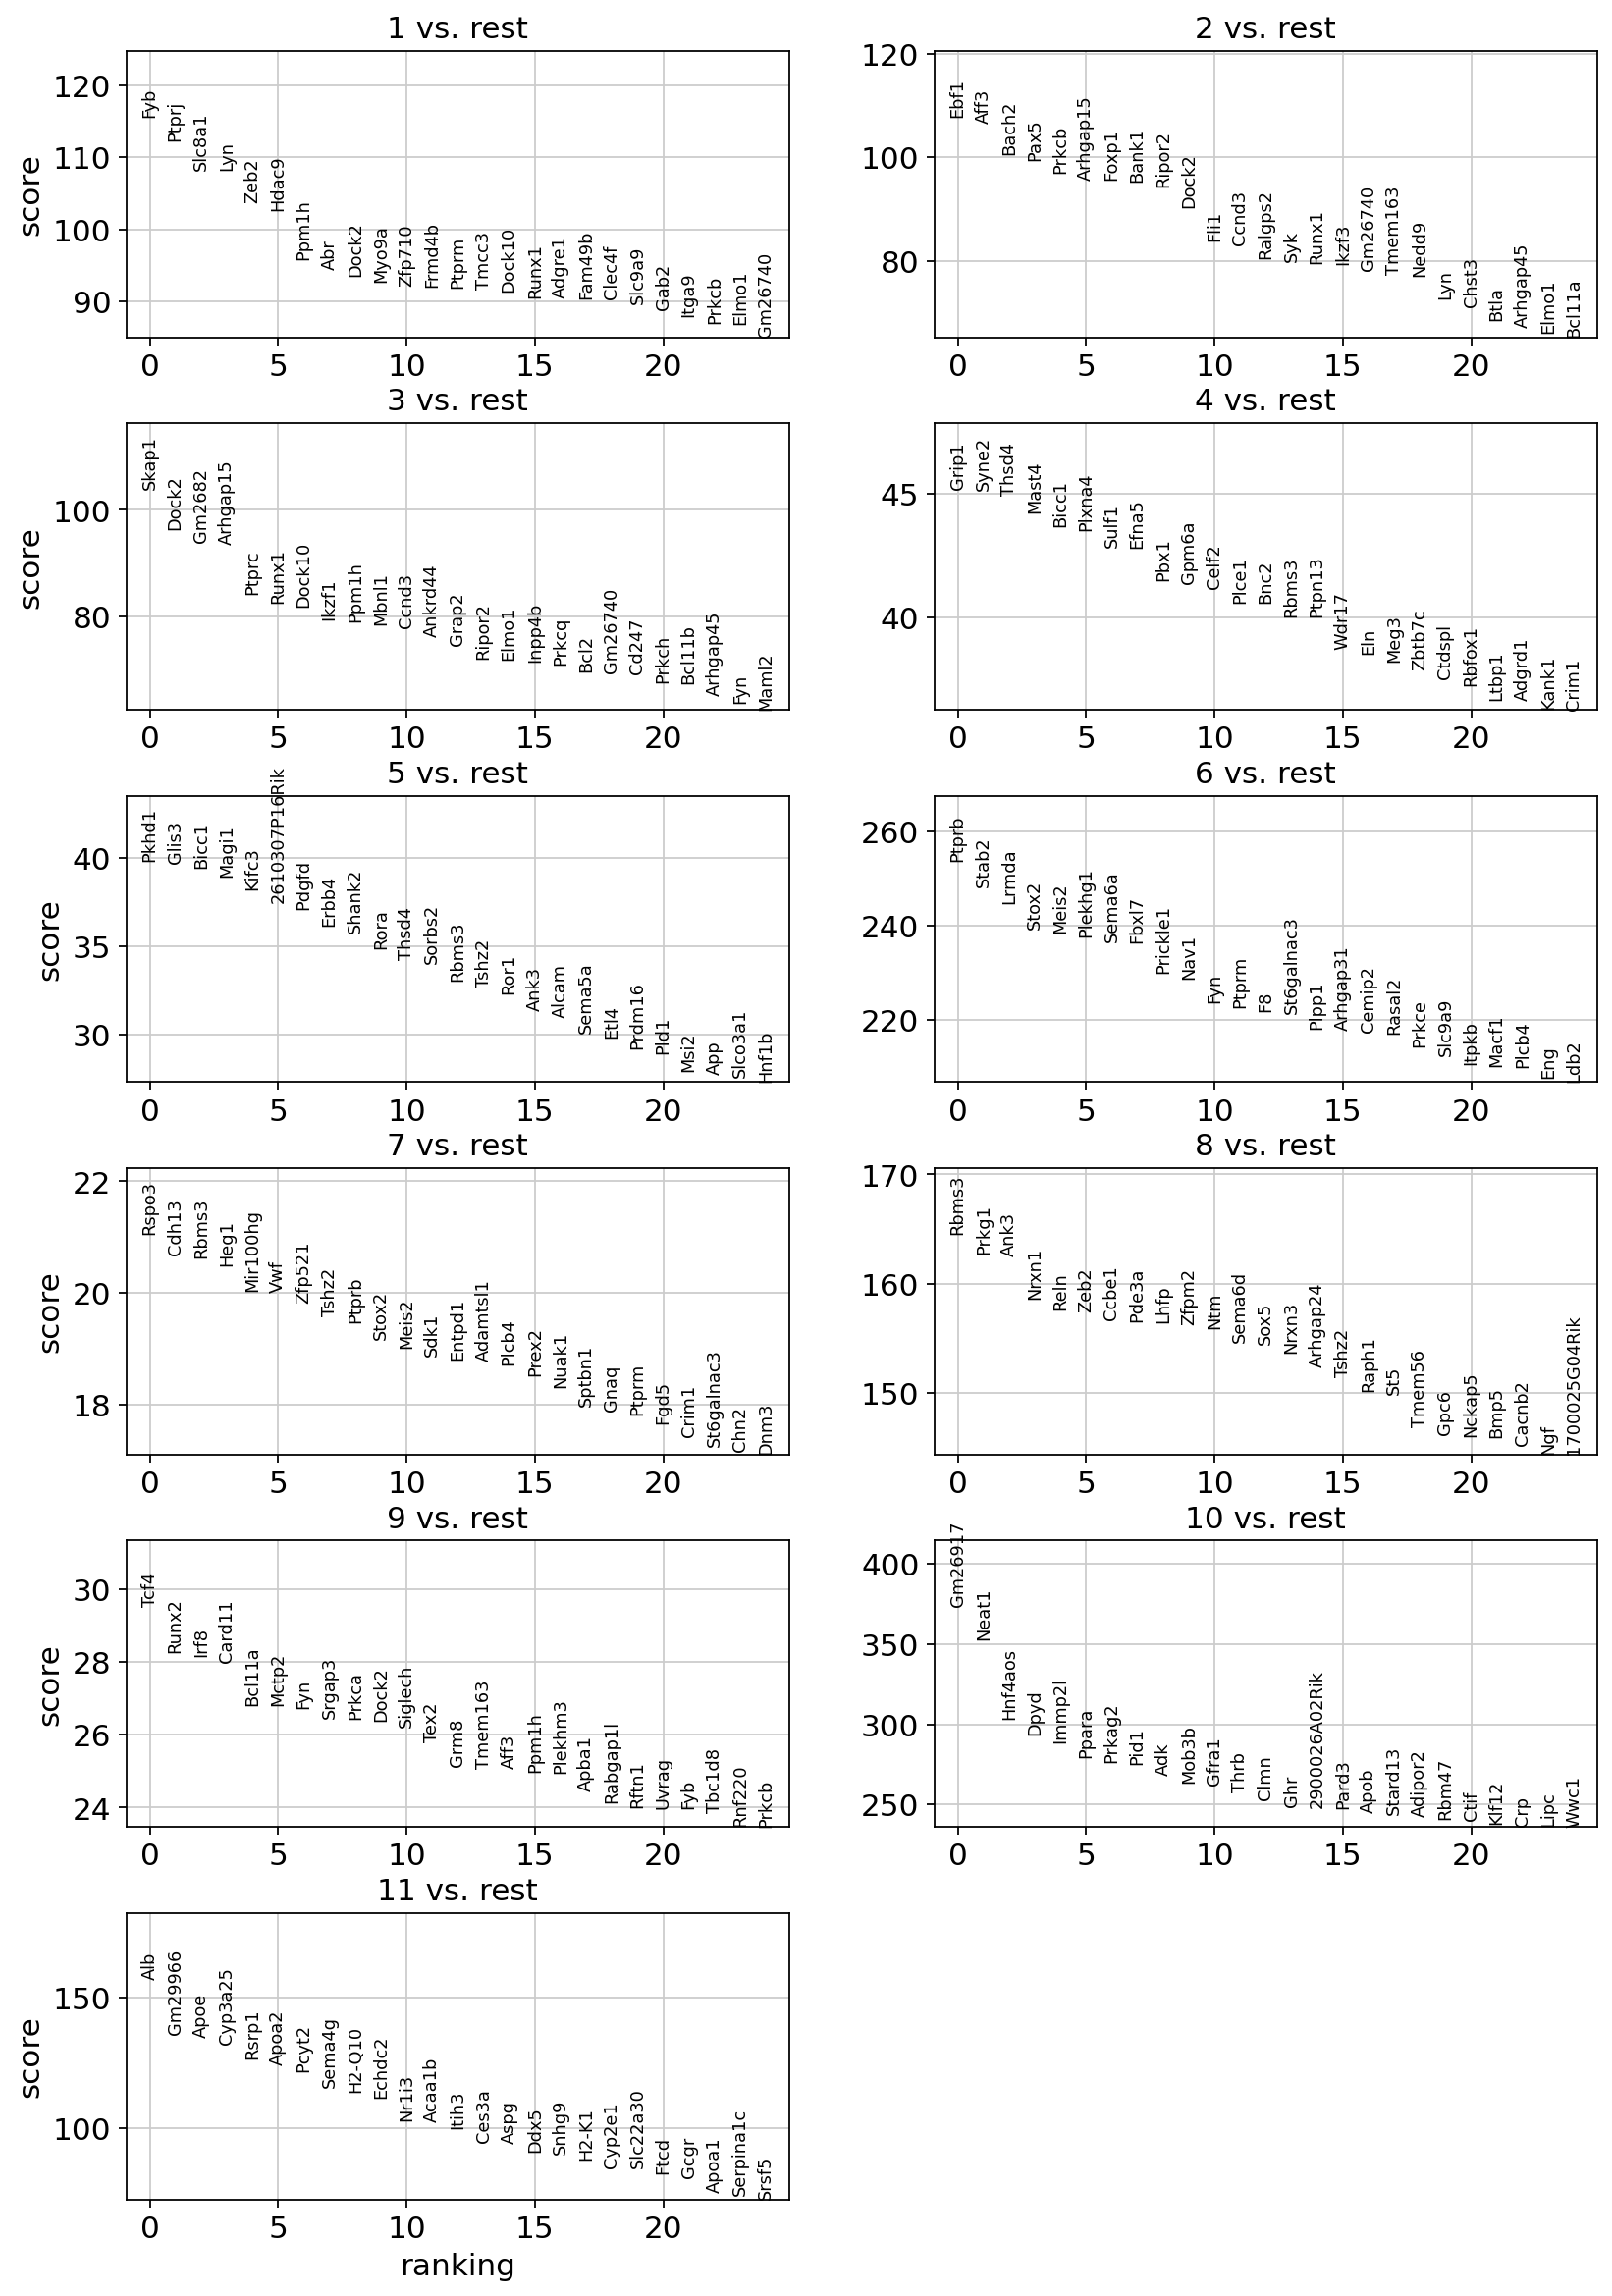

In [23]:
sc.set_figure_params(figsize=(6,3))

sc.pl.rank_genes_groups(cdata_ALL_GENES, 
                        n_genes=25, 
                        sharey=False, 
                        key="Main_Cluster_Wilcoxon",
                        ncols=2,
                        #save='_Ranked_Genes_For_Each_Celltype.pdf'
                       )

# <br> 5. Save Everything

In [26]:
cdata_ALL_GENES

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'Main_Cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'Main_Cluster_colors', 'Time_colors', 'Dose_colors', 'Main_Cluster_Wilcoxon'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'

Add more metadata

In [ ]:
cdata_ALL_GENES.obs['OrigIdent_Celltype'] = cdata.obs['OrigIdent'].astype(str).str.cat(cdata.obs['Celltype'], sep="_")
cdata_ALL_GENES.obs['Dose_Time'] = cdata.obs['Dose'].astype(str).str.cat(cdata.obs['Time'], sep="_")


Save AnnData Object

In [27]:
cdata_ALL_GENES.write_h5ad('./Adata_Objects/01d_AllGenes_Main_Clusters_Wilcoxon_Ranked.h5ad',compression='gzip')


# <br> 6. Determine Cell Types

### <br> Cluster 1 
Some kind of immune cells, probably kupffer cells and/or monocyte derived macrophages.

In [29]:
cdata_ALL_GENES

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'Main_Cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50'
    uns: 'OrigIdent_colors', 'doublet_info_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'Main_Cluster_colors', 'Time_colors', 'Dose_colors', 'Main_Cluster_Wilcoxon'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'

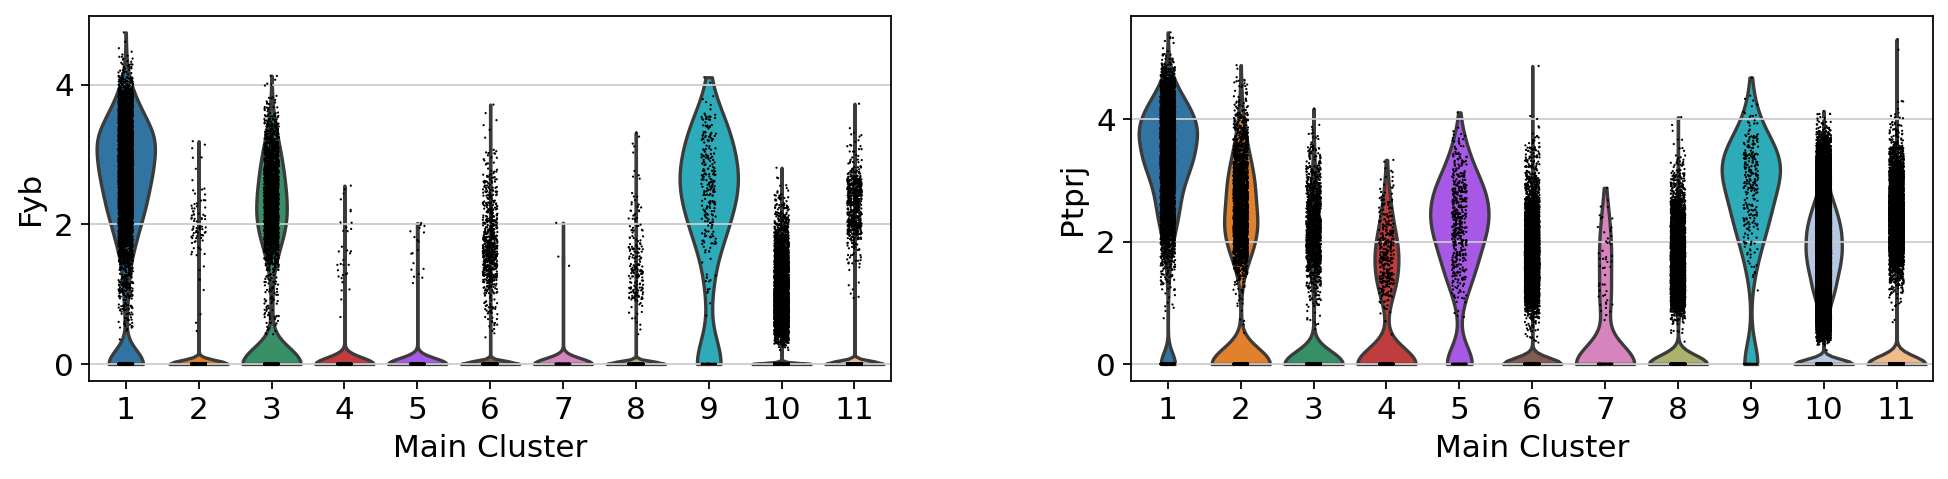

In [30]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Fyb','Ptprj'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 2
Definitely B cells. 
- Ebf1 is Eary B Cell Factor 1.
- Aff3 is expressed in B Cells and pDCs in Guilliams et al (10.1016/j.cell.2021.12.018) so Cluster 9 is probably pDCs.

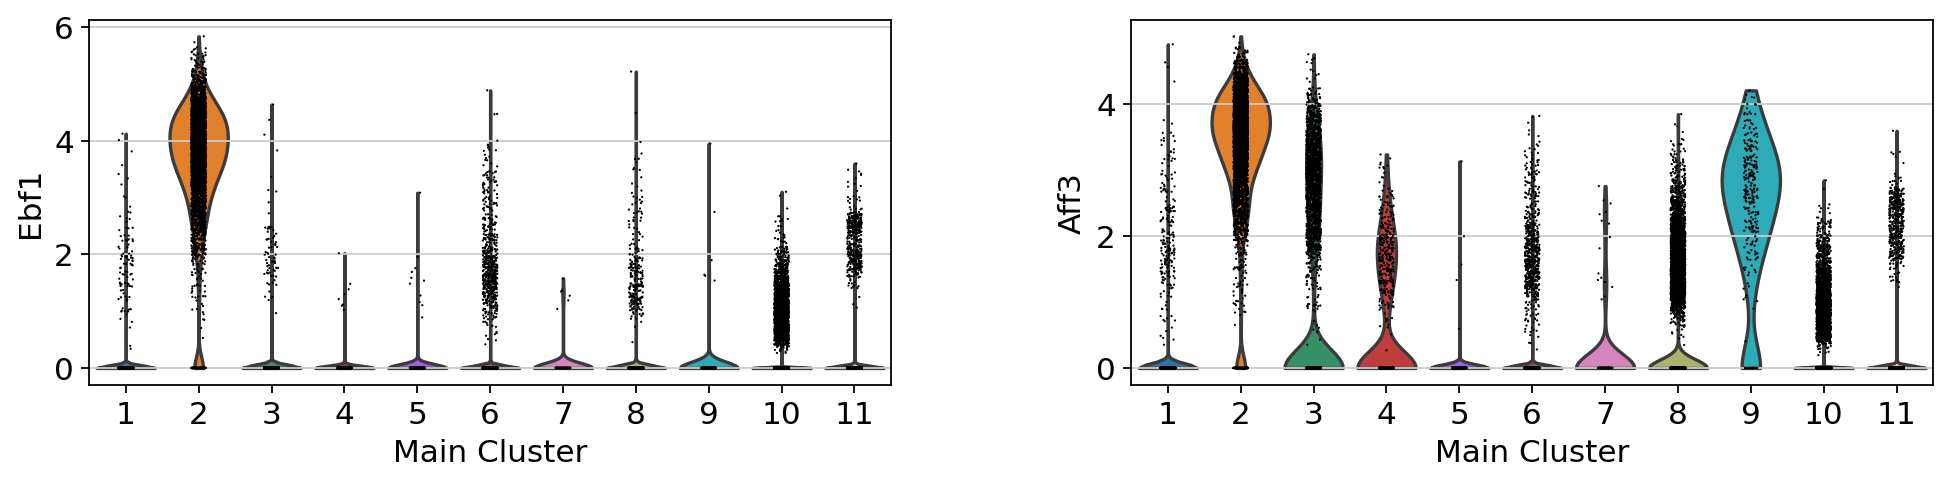

In [31]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Ebf1','Aff3'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 3
Definitely T cells. 
- Skap one is a  T cell adapter protein.
- Overlaying some of Guilliams et al (10.1016/j.cell.2021.12.018) data suggests this cluster might also be comprised of CDC1s and NKs (See Jupyter Notebook 01c...). Further evaulation of this cluster is neccessary. 

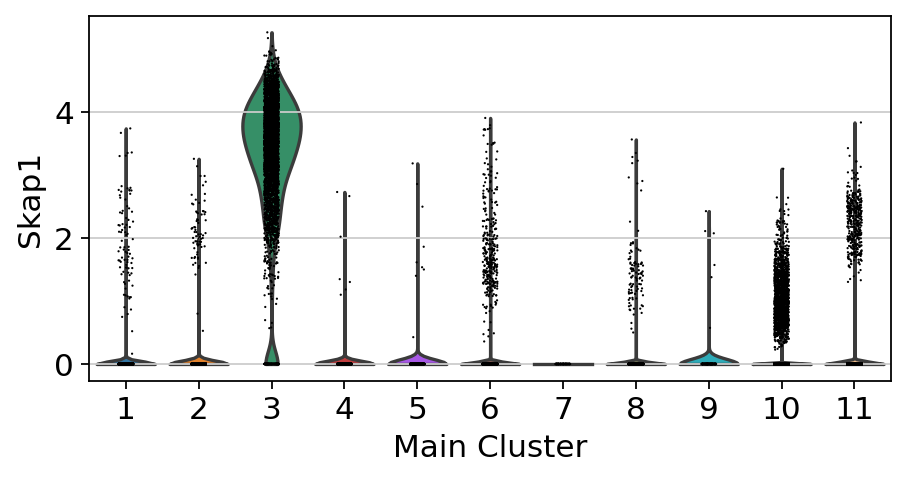

In [32]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Skap1'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 4
Protal Fibroblasts. 
- Rance's Dose Response snRNAseq paper used Mast4 as a marker gene of Protal Fibroblasts.


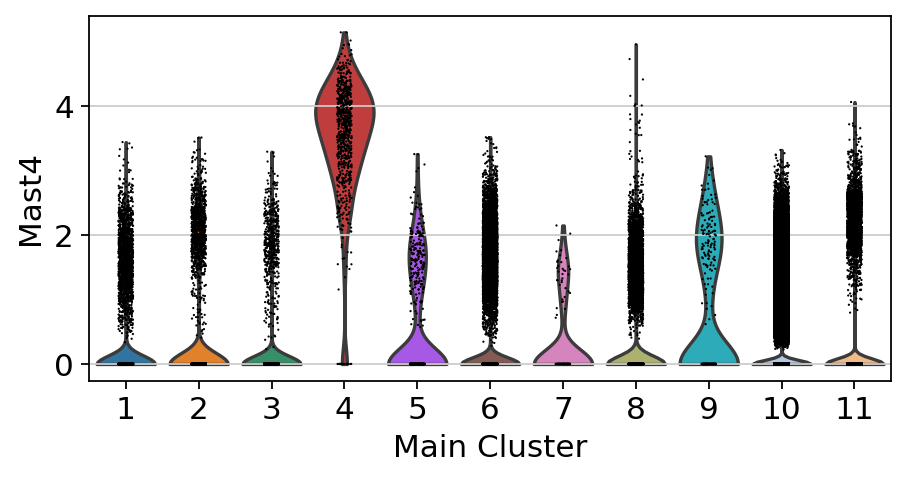

In [33]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Mast4'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 5
Cholangiocytes. 
- Rance's Dose Response snRNAseq paper used Pkhd1 as a marker gene of Cholangiocytes.


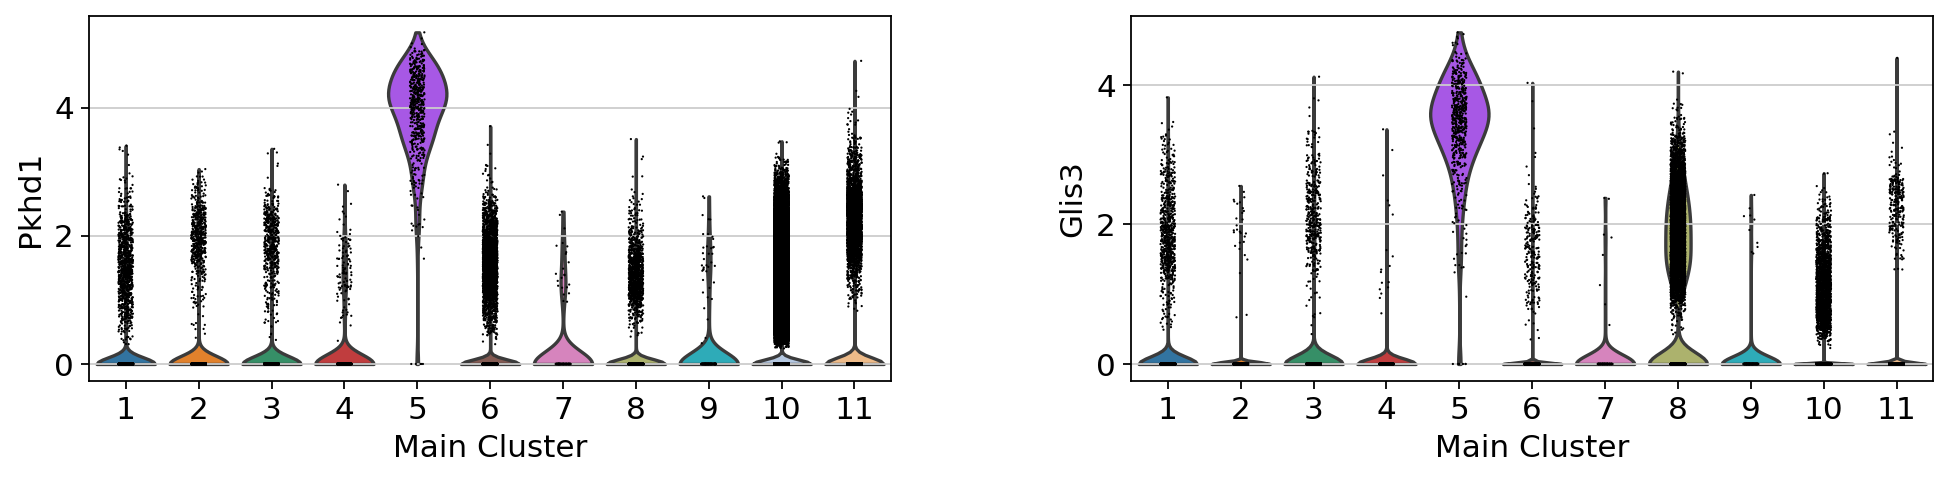

In [36]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Pkhd1', 'Glis3'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 6 and 7 
Endothelial Cells. 
- Overlaying some of Guilliams et al (10.1016/j.cell.2021.12.018) data suggests these clusters are endothleial cells (See Jupyter Notebook 01c...). Further evaulation of this cluster is neccessary to identify subpopulations


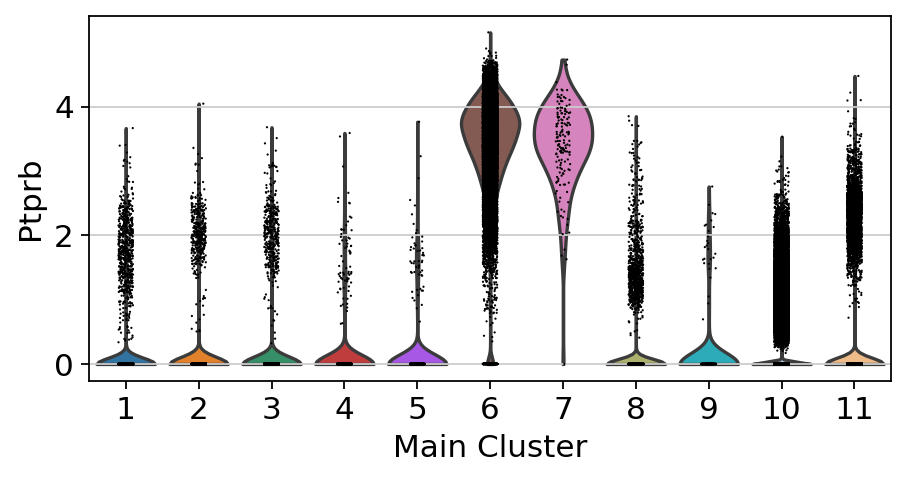

In [38]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Ptprb'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 8
HSCs. 
- Reln is marker of HSC (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4834254/)


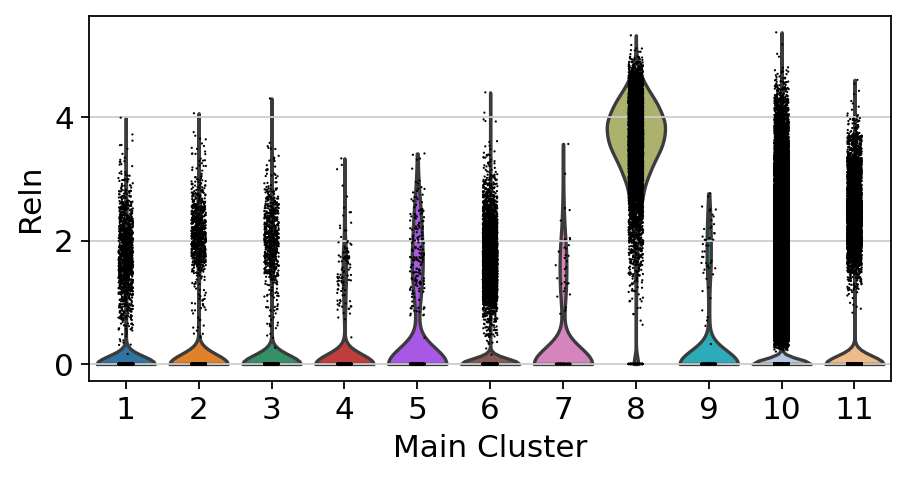

In [42]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Reln'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 9
pDCs. 
- Tcf4 is found primarily in pDCs (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2631034/)
- Aff3 is expressed in B Cells and pDCs in Guilliams et al (10.1016/j.cell.2021.12.018) so Cluster 9 is probably pDCs.

(https://mediatum.ub.tum.de/download/1363174/1363174.pdf) - Ccr9

(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6861835/pdf/cwz062.pdf) - Pdzd4 

(10.1016/j.it.2006.04.005) - Siglech

https://ars.els-cdn.com/content/image/1-s2.0-S0092867421014811-figs2_lrg.jpg - Siglech

?? - Runx2

https://www.biorxiv.org/content/10.1101/2021.07.06.451396v1.full - Irf8


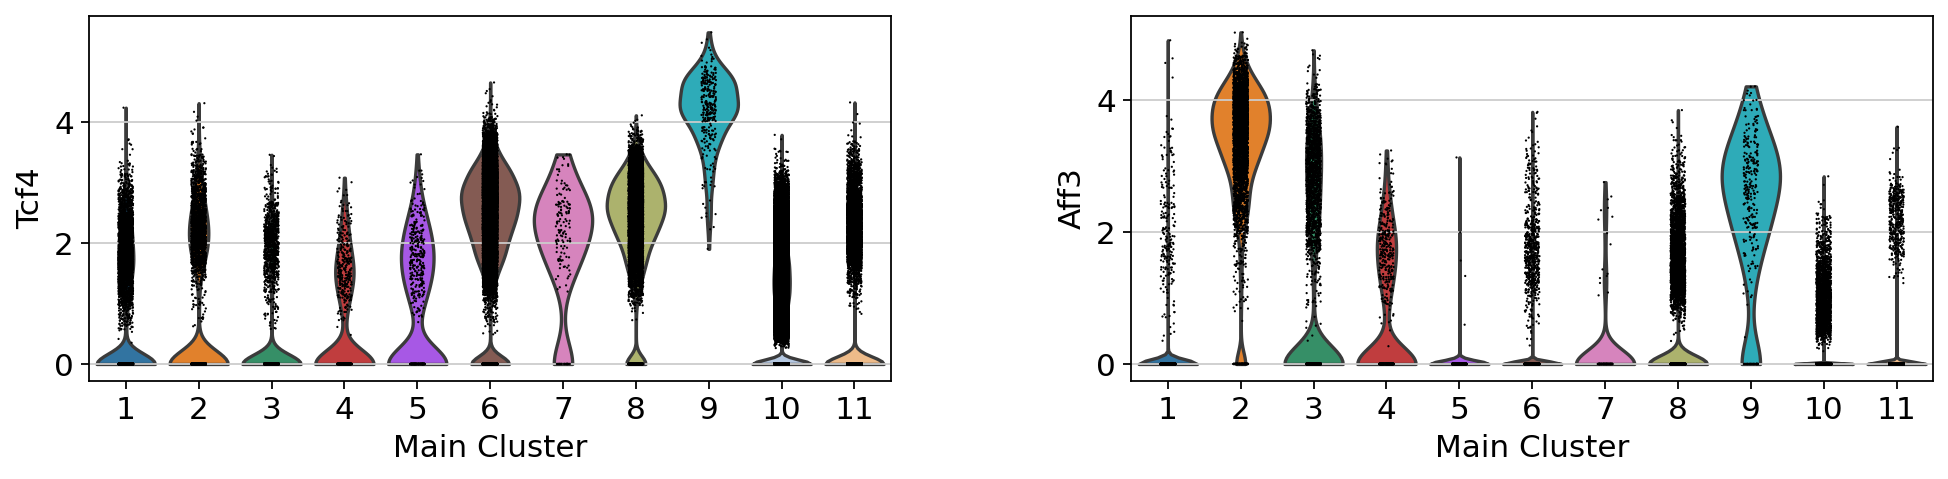

In [44]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Tcf4', 'Aff3'],
    groupby = 'Main_Cluster',
)

### <br> Cluster 10 and 11
Hepatocytes. 



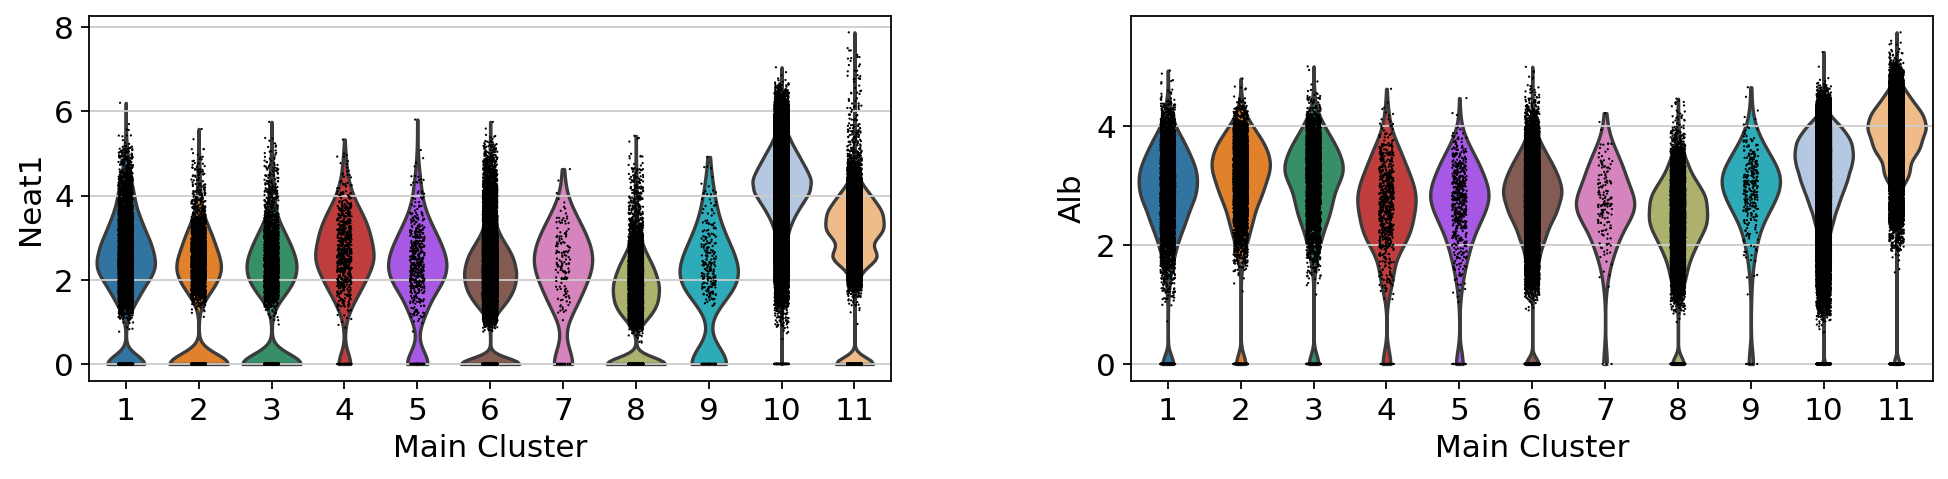

In [45]:
sc.pl.violin(
    cdata_ALL_GENES,
    keys=['Neat1', 'Alb'],
    groupby = 'Main_Cluster',
)

# 6. Conclusions

In this notebook, a working adata object was created in which main clusters were annotated, and marker genes for each clsuter were determined using SCVI. Marker genes will probably be verified using ScanPy.